In [ ]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change directory to your project folder
%cd /content/drive/MyDrive/Predictive_Analytics/Final_project

# Correct folder_path - Adding the leading '/'
folder_path = "/content/drive/MyDrive/Predictive_Analytics/Final_project"
# Define file_names
file_names = ['synthetic_beverage_sales_data.csv']  # Replace with actual file names

# Read CSV files into a list of DataFrames
df = pd.read_csv(os.path.join(folder_path, file_names[0]), encoding='latin-1')
df['Order_Date'] = pd.to_datetime(df['Order_Date'])


/content/drive/MyDrive/Predictive_Analytics/Final_project


## Properly Check if df is a List or a DataFrame

In [ ]:
import pandas as pd

# Ensure 'df' is a list before checking its contents
if isinstance(df, list) and df:  # ✅ Check if 'df' is a non-empty list
    if isinstance(df[0], pd.DataFrame):
        df = df[0]  # Access the DataFrame within the list

# Ensure 'df' is a DataFrame before proceeding
if isinstance(df, pd.DataFrame):
    print(df.info())
    print("\n---\n")
    print(df.describe(include='all'))
    print("\n---\n")
    print("First 5 rows:\n", df.head())
    print("\n---\n")
    print("Number of unique values in each column:\n", df.nunique())
    print("\n---\n")

    # Loop through columns and print first 20 unique values
    for col in df.columns:
        unique_values = df[col].unique()[:20]  # Show first 20 unique values
        print(f'Column: {col}, Unique values: {unique_values}')
        print("-" * 50)

else:
    print("DataFrame not found or not properly loaded.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Order_ID       object        
 1   Customer_ID    object        
 2   Customer_Type  object        
 3   Product        object        
 4   Category       object        
 5   Unit_Price     float64       
 6   Quantity       int64         
 7   Discount       float64       
 8   Total_Price    float64       
 9   Region         object        
 10  Order_Date     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 755.3+ MB
None

---

       Order_ID Customer_ID Customer_Type         Product  \
count   8999910     8999910       8999910         8999910   
unique  3000000       10000             2              47   
top        ORD1     CUS4693           B2C  Hohes C Orange   
freq          5        1120       5795405          337114   
mean        NaN         NaN      

In [ ]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region',
       'Order_Date'],
      dtype='object')

In [ ]:
Total_Price= df["Total_Price"].sum()
print("Total sum of Total_Price:", Total_Price)

Total sum of Total_Price: 1176681163.3500004


Outlier detection

In [ ]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy import stats

# # Concatenate all DataFrames into one
# df_combined = pd.concat(df, ignore_index=True)

# # Define the column to check for outliers
# column = "Total_Price"

# # Ensure column is numeric
# df_combined[column] = pd.to_numeric(df_combined[column], errors='coerce')

# # Drop missing values in the column
# df_combined = df_combined.dropna(subset=[column])

# # 1. Summary Statistics (Detecting Outliers using IQR)
# Q1 = df_combined[column].quantile(0.25)
# Q3 = df_combined[column].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = df_combined[(df_combined[column] < lower_bound) | (df_combined[column] > upper_bound)]

# print(f"Number of outliers in {column}: {len(outliers)}")
# print("Outliers (first 10 rows):")
# print(outliers.head(10))

# # 2. Box Plot for Visualizing Outliers
# plt.figure(figsize=(10, 5))
# sns.boxplot(x=df_combined[column])
# plt.title(f"Box Plot of {column}")
# plt.grid(True)
# plt.show()

# # 3. Histogram for Distribution Analysis
# plt.figure(figsize=(10, 5))
# sns.histplot(df_combined[column], bins=50, kde=True)
# plt.title(f"Histogram of {column} (with KDE)")
# plt.xlabel(column)
# plt.ylabel("Frequency")
# plt.grid(True)
# plt.show()

# # 4. Z-Score Method (Alternative Outlier Detection)
# z_scores = np.abs(stats.zscore(df_combined[column]))
# outliers_zscore = df_combined[z_scores > 3]  # Common threshold for outliers

# print(f"Outliers detected using Z-score method: {len(outliers_zscore)}")
# print(outliers_zscore.head(10))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # using a valid style name
sns.set_palette("husl")


# Ensure Demand is numeric
df["Total_Price"] = pd.to_numeric(df["Total_Price"], errors="coerce")

# Convert "Order_Date" to datetime format
date_col = "Order_Date"
if date_col in df.columns:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
else:
    raise KeyError(f"Column '{date_col}' not found in the dataset!")

# Extract Year-Month for aggregation
df["Year-Month"] = df[date_col].dt.to_period("M").astype(str)
df["Year"]= df[date_col].dt.to_period("Y").astype(str)

# Aggregate Demand by month (for overall trend)
monthly_sales = df.groupby("Year-Month")["Total_Price"].sum().reset_index()

#Aggregate by Year

# Assume df has columns "Order_Date" and "Total_Price"
date_col = "Order_Date"
df["Year"] = df[date_col].dt.to_period("Y").astype(str)

# Now you can aggregate Total_Price by year:
yearly_sales = df.groupby("Year")["Total_Price"].sum().reset_index()


monthly_category_sales = df.groupby(["Year-Month", "Category"])["Total_Price"].sum().reset_index()
yearly_category_sales = df.groupby(["Year", "Category"])["Total_Price"].sum().reset_index()
yearly_Region_Sales= df.groupby(["Year", "Region"])["Total_Price"].sum().reset_index()
monthly_Produc_Sales = df.groupby(["Year-Month", "Product"])["Total_Price"].sum().reset_index()
monthly_Customer_Sales = df.groupby(["Year-Month", "Customer_ID"])["Total_Price"].sum().reset_index()
yearly_CustomerType_sales = df.groupby(["Year", "Customer_Type"])["Total_Price"].sum().reset_index()
print(yearly_sales)

   Year   Total_Price
0  2021  3.800466e+08
1  2022  3.948598e+08
2  2023  4.017747e+08


## Monthly Sale aggregation for EDA Analysis

Available columns after renaming: ['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category', 'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region', 'Order_Date', 'Year-Month', 'Year']

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Order_ID       object        
 1   Customer_ID    object        
 2   Customer_Type  object        
 3   Product        object        
 4   Category       object        
 5   Unit_Price     float64       
 6   Quantity       int64         
 7   Discount       float64       
 8   Total_Price    float64       
 9   Region         object        
 10  Order_Date     datetime64[ns]
 11  Year-Month     object        
 12  Year           object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 892.6+ MB

MISSING VALUES:
Order_ID         0
Customer_ID      0
Customer

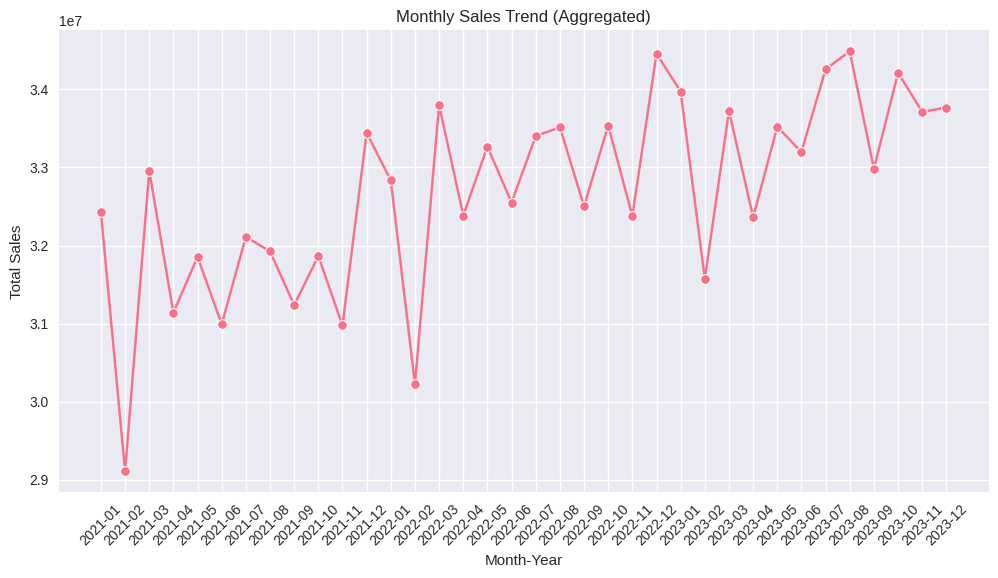

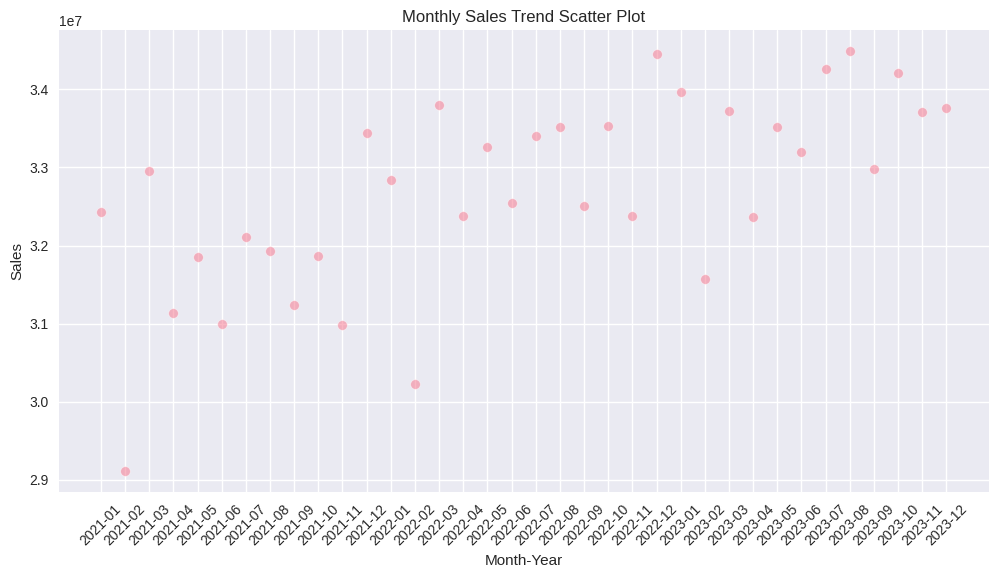

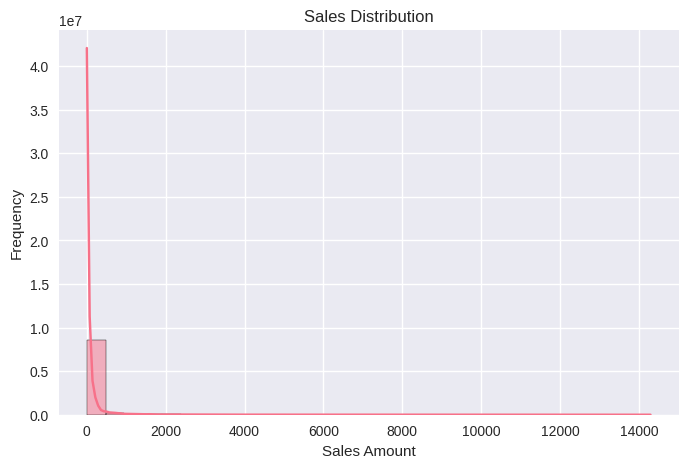

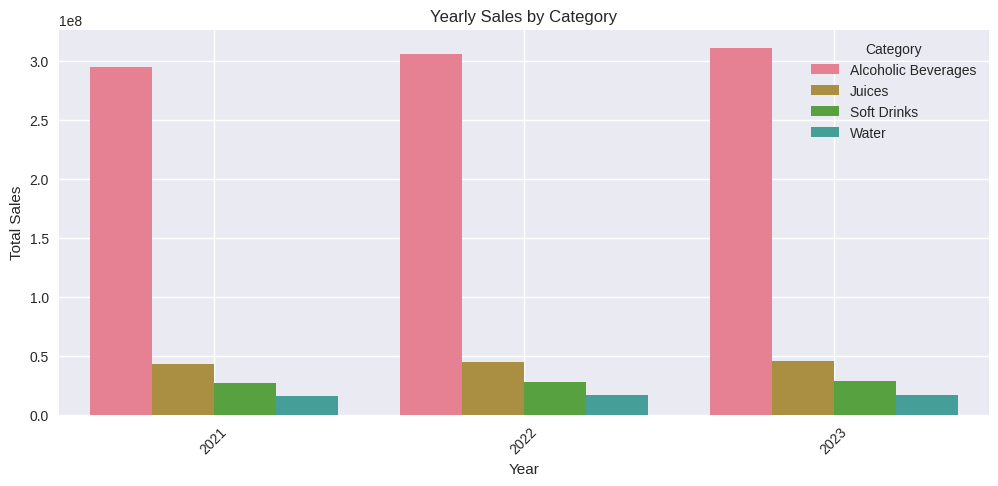

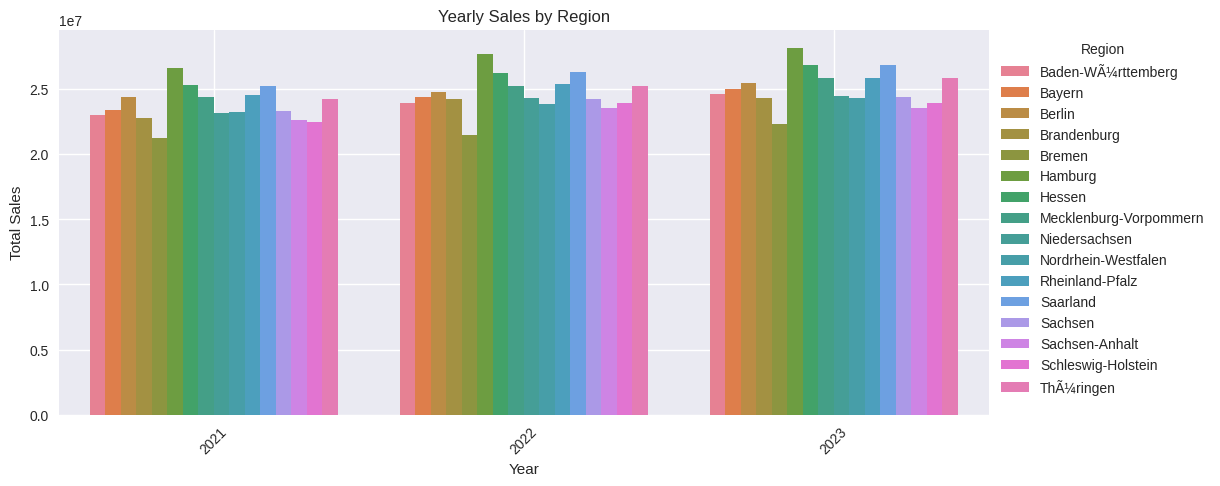

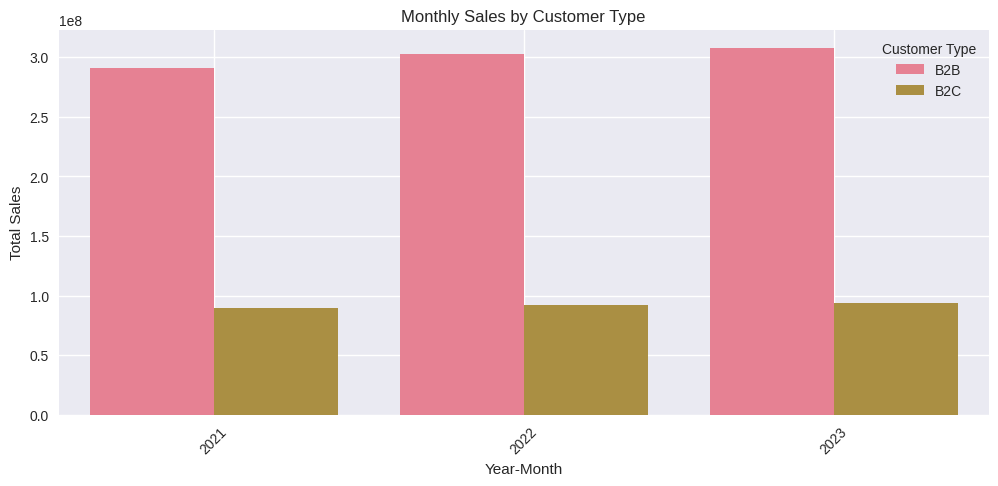

In [ ]:
 #NEW: Analysis for Customer
# 1. Total Sales per customer
customer_sales = df.groupby("Customer_ID")["Total_Price"].sum().sort_values(ascending=False).reset_index()
customer_sales = customer_sales.rename(columns={"Total_Price": "Total_Sales"})  # Rename for clarity

# 2. Count of orders per customer
customer_order_count = df.groupby("Customer_ID").size().reset_index(name="order_count")

# 3. Average order value per customer
customer_analysis = pd.merge(customer_sales, customer_order_count, on="Customer_ID")
customer_analysis["avg_order_value"] = customer_analysis["Total_Sales"] / customer_analysis["order_count"]

# 4. Sort by total sales for analysis
customer_analysis = customer_analysis.sort_values("Total_Sales", ascending=False).reset_index(drop=True)

# Debug: Print columns to verify renaming
print("Available columns after renaming:", df.columns.tolist())

# Print dataset info
print("\nDATASET INFO:")
df.info()

# Print missing values
print("\nMISSING VALUES:")
print(df.isnull().sum())

# Print summary statistics
print("\nSUMMARY STATISTICS:")
print(df.describe())

# NEW: Print customer analysis summary
print("\nTOP 10 CUSTOMERS BY SALES:")
print(customer_analysis.head(10))

# Monthly Sales Trend (Line Plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Year-Month", y="Total_Price", marker="o")
plt.title("Monthly Sales Trend (Aggregated)")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Scatter Plot: Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.scatterplot(data=monthly_sales, x="Year-Month", y="Total_Price", alpha=0.5)
plt.title("Monthly Sales Trend Scatter Plot")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Total_Price"], bins=30, kde=True)  # Assuming "Demand" is represented by "Total_Price"
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Sales by Category (Monthly Aggregation)
plt.figure(figsize=(12, 5))
sns.barplot(data=yearly_category_sales, x="Year", y="Total_Price", hue="Category")
plt.title("Yearly Sales by Category")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Category")
plt.show()

# Sales by 'Region' (Yearly Aggregation)
plt.figure(figsize=(12, 5))
sns.barplot(data=yearly_Region_Sales, x="Year", y="Total_Price", hue="Region")
plt.title("Yearly Sales by Region")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Region", bbox_to_anchor=(1, 1))
plt.show()


# Sales by customer type (Monthly Aggregation)
plt.figure(figsize=(12, 5))
sns.barplot(data=yearly_CustomerType_sales, x="Year", y="Total_Price", hue="Customer_Type")
plt.title("Monthly Sales by Customer Type")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Customer Type")
plt.show()


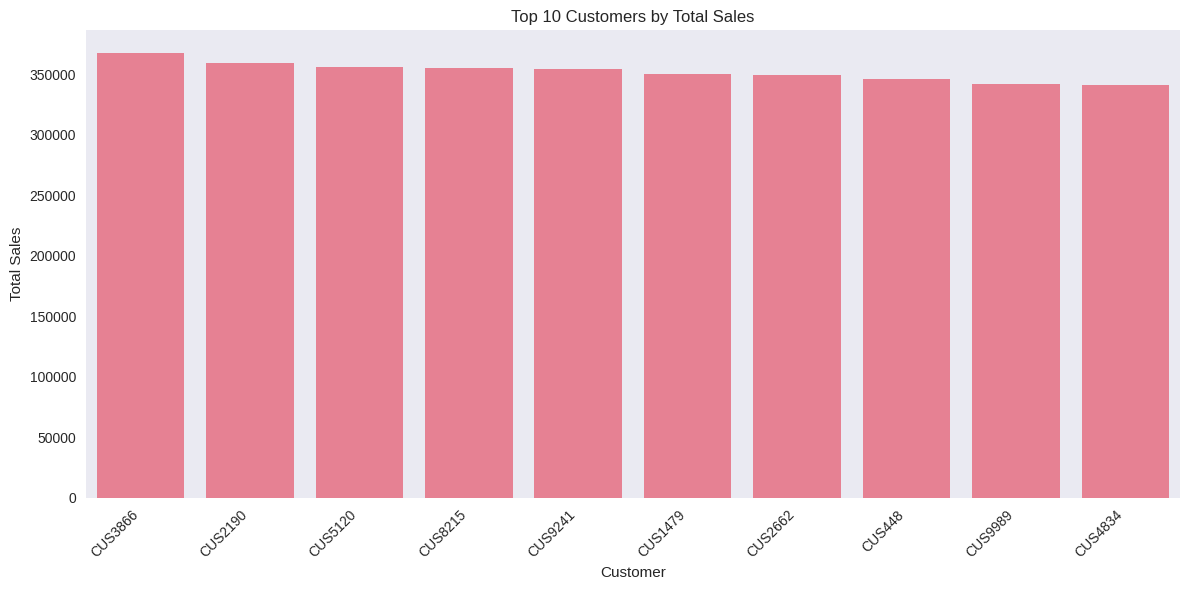

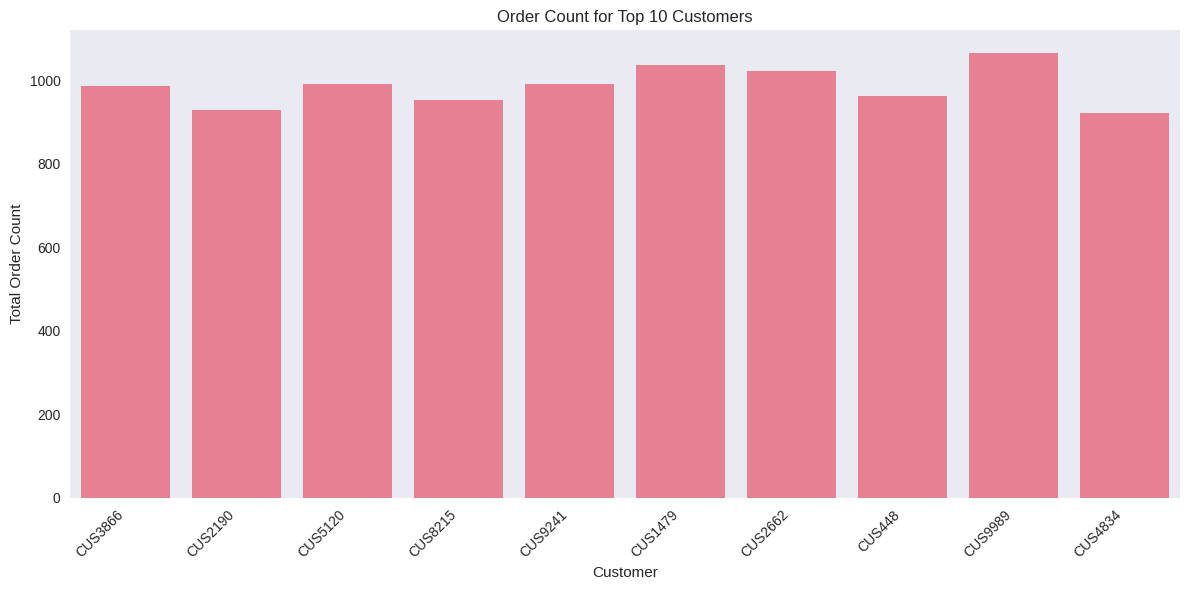

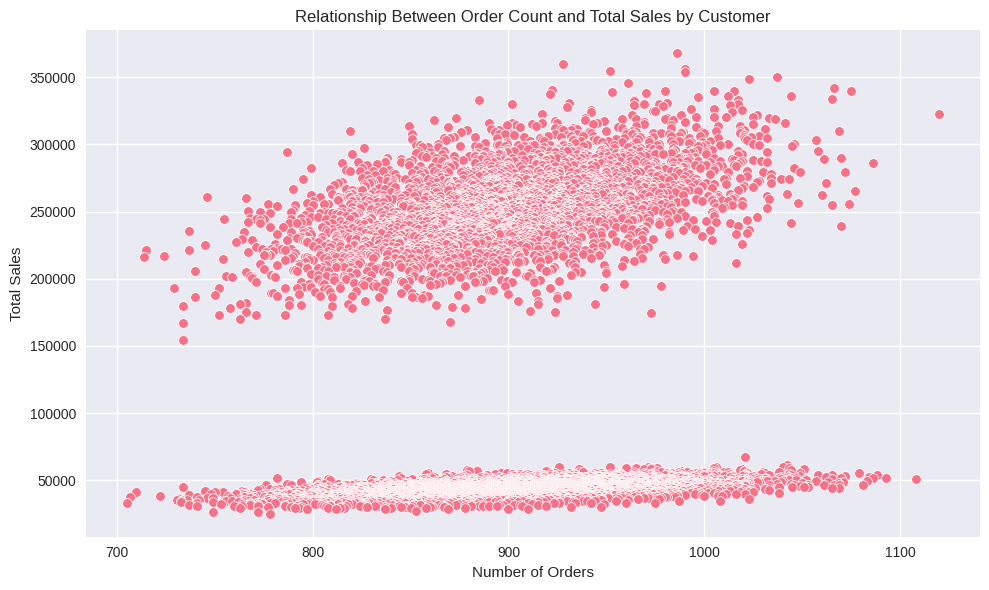

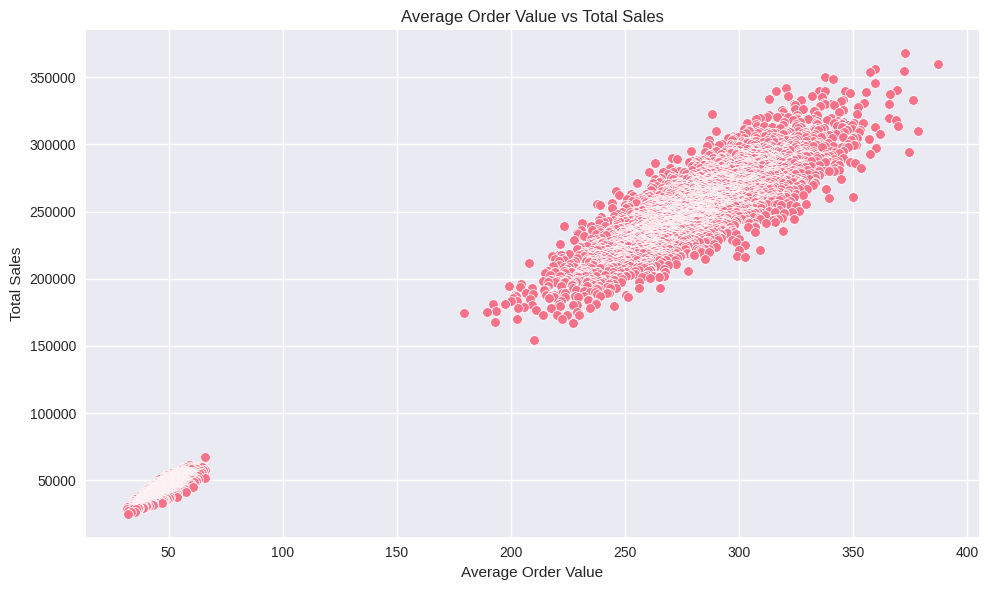

In [ ]:
# Top 10 Customers by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_analysis.head(10), x="Customer_ID", y="Total_Sales")  # Use 'Customer_ID' and 'Total_Sales'
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Customer")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Order Count by Customer (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_analysis.head(10), x="Customer_ID", y="order_count")  # Use 'Customer_ID' and 'order_count'
plt.title("Order Count for Top 10 Customers")
plt.xlabel("Customer")
plt.ylabel("Total Order Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# Scatter plot of Order Count vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_analysis, x="order_count", y="Total_Sales")  # Use 'order_count' and 'Total_Sales'
plt.title("Relationship Between Order Count and Total Sales by Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot of Average Order Value vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_analysis, x="avg_order_value", y="Total_Sales")  # Use 'avg_order_value' and 'Total_Sales'
plt.title("Average Order Value vs Total Sales")
plt.xlabel("Average Order Value")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

## Weekly aggregation of Sales for seasonality visualization

## Weekly aggregation and visualization  without Descriptive Stats

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set visualization style
# plt.style.use('seaborn-v0_8')  # Using a valid style name
# sns.set_palette("husl")

# # Ensure Total_Price is numeric
# df["Total_Price"] = pd.to_numeric(df["Total_Price"], errors="coerce")

# # Convert "Order_Date" to datetime format
# date_col = "Order_Date"
# if date_col in df.columns:
#     df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
# else:
#     raise KeyError(f"Column '{date_col}' not found in the dataset!")

# # Extract Year-Week for aggregation
# df["Year-Week"] = df[date_col].dt.to_period("W").astype(str)
# df["Year"] = df[date_col].dt.to_period("Y").astype(str)
# # --- LINE PLOT (Weekly) ---
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=weekly_sales, x="Year-Week", y="Total_Price", marker="o")
# plt.title("Weekly Sales Trend (Aggregated)")
# plt.xlabel("Week (Year-Week)")
# plt.ylabel("Total_Price")
# plt.tick_params(axis='x', which='both', labelbottom=False)  # Hide date tick labels
# plt.grid(True)
# plt.show()

# # --- SCATTER PLOT (Weekly) ---
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=weekly_sales, x="Year-Week", y="Total_Price", alpha=0.5)
# plt.title("Weekly Sales Trend Scatter Plot")
# plt.xlabel("Week (Year-Week)")
# plt.ylabel("Total_Price")
# plt.tick_params(axis='x', which='both', labelbottom=False)  # Hide date tick labels
# plt.grid(True)
# plt.show()


Creating Forecast Model

In [ ]:
print (df)

           Order_ID Customer_ID Customer_Type              Product  \
0              ORD1     CUS1496           B2B           Vio Wasser   
1              ORD1     CUS1496           B2B                Evian   
2              ORD1     CUS1496           B2B               Sprite   
3              ORD1     CUS1496           B2B   Rauch Multivitamin   
4              ORD1     CUS1496           B2B         Gerolsteiner   
...             ...         ...           ...                  ...   
8999905  ORD2999999     CUS7080           B2C        Schwip Schwap   
8999906  ORD2999999     CUS7080           B2C       San Pellegrino   
8999907  ORD3000000     CUS6551           B2B             Red Bull   
8999908  ORD3000000     CUS6551           B2B  Passion Fruit Juice   
8999909  ORD3000000     CUS6551           B2B               Vittel   

            Category  Unit_Price  Quantity  Discount  Total_Price  \
0              Water        1.66        53      0.10        79.18   
1              Water 

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

In [ ]:
# Convert 'Order_Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Set it as index
df.set_index('Order_Date', inplace=True)

In [ ]:

# Drop unnecessary columns
df = df.drop(columns=('Order_ID', 'Customer_ID', 'Customer_Type', 'Product',
                   'Category', 'Unit_Price', 'Quantity', 'Discount', 'Region'), errors='ignore')




# Print the first few rows to confirm changes
print(df.head())

           Order_ID Customer_ID Customer_Type             Product  \
Order_Date                                                          
2023-08-23     ORD1     CUS1496           B2B          Vio Wasser   
2023-08-23     ORD1     CUS1496           B2B               Evian   
2023-08-23     ORD1     CUS1496           B2B              Sprite   
2023-08-23     ORD1     CUS1496           B2B  Rauch Multivitamin   
2023-08-23     ORD1     CUS1496           B2B        Gerolsteiner   

               Category  Unit_Price  Quantity  Discount  Total_Price  \
Order_Date                                                             
2023-08-23        Water        1.66        53      0.10        79.18   
2023-08-23        Water        1.56        90      0.10       126.36   
2023-08-23  Soft Drinks        1.17        73      0.05        81.14   
2023-08-23       Juices        3.22        59      0.10       170.98   
2023-08-23        Water        0.87        35      0.10        27.40   

           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8999910 entries, 2023-08-23 to 2022-04-09
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Year-Month     object 
 11  Year           object 
dtypes: float64(3), int64(1), object(8)
memory usage: 892.6+ MB


In [ ]:
# Ensure the DataFrame is sorted by date in ascending order
df = df.sort_index()




In [ ]:
print(type(df.index))  # Check what type the index is
print(df.index[:5])  # Print first 5 values of the index



<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01'],
              dtype='datetime64[ns]', name='Order_Date', freq=None)


In [ ]:
# Aggregate data to ensure only one value per day (e.g., sum of Total_Price per day)
df = df.groupby('Order_Date').agg({'Total_Price': 'sum'})

# Print to check the fix
print(df.head())  # Should show only one row per day


            Total_Price
Order_Date             
2021-01-01    987429.55
2021-01-02   1067311.95
2021-01-03    964076.37
2021-01-04   1033108.49
2021-01-05   1083223.79


In [ ]:
df = df.sort_index()


In [ ]:
df = df.asfreq('D')

# Check if frequency is set correctly
print(df.index.freq)  # Should return 'D'


<Day>


In [ ]:

print(type(df.index))  # Should return <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

print(df.index.freq)  # Should return 'D'
print(df.head())  # Should now show a clean daily time series

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<Day>
            Total_Price
Order_Date             
2021-01-01    987429.55
2021-01-02   1067311.95
2021-01-03    964076.37
2021-01-04   1033108.49
2021-01-05   1083223.79


In [ ]:
print(df.index.is_monotonic_increasing)  # Should return True or False


True


In [ ]:
print(df.index[:5])   # First 5 dates
print(df.index[-5:])  # Last 5 dates


DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05'],
              dtype='datetime64[ns]', name='Order_Date', freq='D')
DatetimeIndex(['2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30'],
              dtype='datetime64[ns]', name='Order_Date', freq='D')


In [ ]:
df = df.sort_index()
print(df.index.is_monotonic_increasing)  # Should return True


True


In [ ]:
# Extract the series
series = df['Total_Price']

In [ ]:
series = series.resample('ME').mean()  # Resample to monthly frequency

# Apply STL decomposition for visualizing the data
stl = STL(series, seasonal=13, period=12)  # Monthly data with yearly seasonality
result = stl.fit()

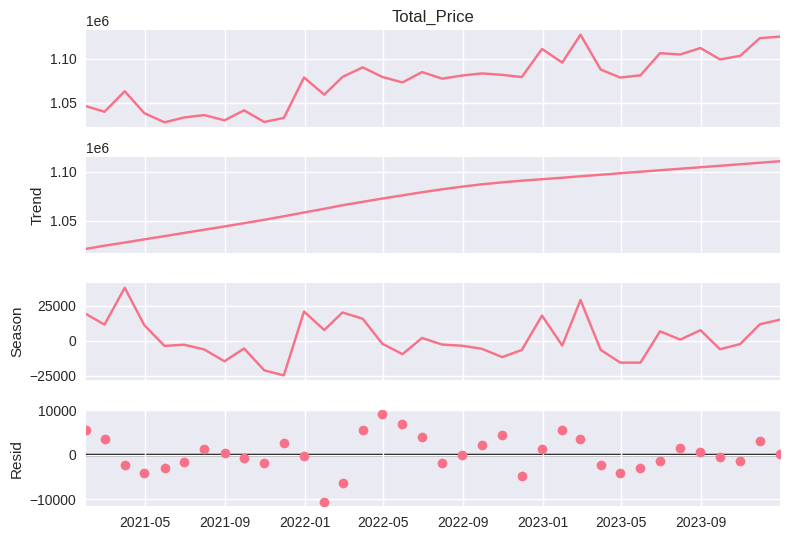

In [ ]:
# Plot the results
result.plot()
plt.show()

# Implemention of Exponential Smoothing (Holt-Winters Method)

In [ ]:
# Remove duplicates and aggregate daily Total_Price (if necessary)
df = df.groupby('Order_Date').agg({'Total_Price': 'sum'})

# Sort the index in ascending order
df = df.sort_index()
# Print to check
print(df.head())  # First 5 rows
print(df.tail())  # Last 5 rows

            Total_Price
Order_Date             
2021-01-01    987429.55
2021-01-02   1067311.95
2021-01-03    964076.37
2021-01-04   1033108.49
2021-01-05   1083223.79
            Total_Price
Order_Date             
2023-12-26   1061194.29
2023-12-27   1150206.36
2023-12-28   1203390.15
2023-12-29   1085887.49
2023-12-30   1039027.36


In [ ]:
# Ensure no zero or negative values (important for multiplicative model)
df['Total_Price'] = df['Total_Price'].apply(lambda x: max(x, 0.01))


In [ ]:
# Set daily frequency
df = df.asfreq('D')

# Confirm that index is properly set
print("Is index monotonic increasing?", df.index.is_monotonic_increasing)  # Should be True
print("Index frequency:", df.index.freq)  # Should return 'D'


Is index monotonic increasing? True
Index frequency: <Day>


In [ ]:
df['Total_Price'] = df['Total_Price'].apply(lambda x: max(x, 0.01))  # Avoid zero values

In [ ]:
#import the library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Fit the model with manually set smoothing parameters
model_multiplicative = ExponentialSmoothing(
    df, seasonal='mul', seasonal_periods=12, trend='add'
).fit(
    smoothing_level=0.2,
    smoothing_trend=0.1,
    smoothing_seasonal=0.1,
    optimized=False  # Avoids the convergence issue
)
# Forecast next 30 days
forecast_multiplicative = model_multiplicative.forecast(30)

# Print forecast results
print(forecast_multiplicative)

2023-12-31    1.149921e+06
2024-01-01    1.125272e+06
2024-01-02    1.105730e+06
2024-01-03    1.129409e+06
2024-01-04    1.121668e+06
2024-01-05    1.140753e+06
2024-01-06    1.118310e+06
2024-01-07    1.108168e+06
2024-01-08    1.121527e+06
2024-01-09    1.120134e+06
2024-01-10    1.127245e+06
2024-01-11    1.120985e+06
2024-01-12    1.142746e+06
2024-01-13    1.118247e+06
2024-01-14    1.098824e+06
2024-01-15    1.122351e+06
2024-01-16    1.114654e+06
2024-01-17    1.133616e+06
2024-01-18    1.111311e+06
2024-01-19    1.101228e+06
2024-01-20    1.114500e+06
2024-01-21    1.113111e+06
2024-01-22    1.120175e+06
2024-01-23    1.113950e+06
2024-01-24    1.135571e+06
2024-01-25    1.111222e+06
2024-01-26    1.091917e+06
2024-01-27    1.115292e+06
2024-01-28    1.107641e+06
2024-01-29    1.126480e+06
Freq: D, dtype: float64


In [ ]:
# Split data into training and test sets
prediction_length = 120
train_df = df.iloc[:len(df) - prediction_length]
test_df = df.iloc[len(df) - prediction_length:]

In [ ]:
# Apply Holt-Winters Exponential Smoothing (multiplicative method)
model_multiplicative = ExponentialSmoothing(train_df, seasonal='mul', seasonal_periods=12, trend='add').fit()
forecast_multiplicative = model_multiplicative.forecast(len(test_df))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


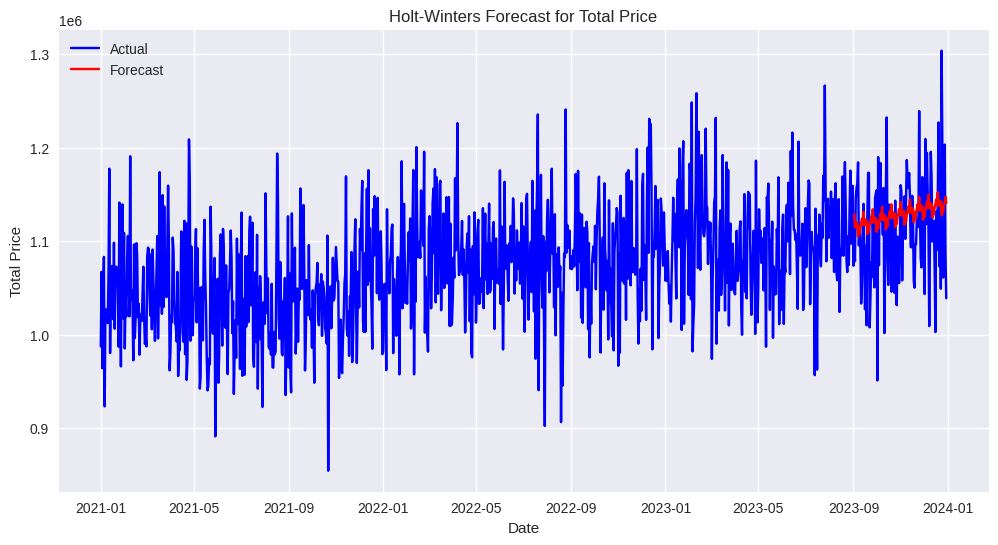

In [ ]:
# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total_Price'], label="Actual", color='blue')
plt.plot(forecast_multiplicative.index, forecast_multiplicative, label="Forecast", color='red')
plt.title("Holt-Winters Forecast for Total Price")
plt.xlabel("Date")
plt.ylabel("Total Price")
plt.legend()
plt.show()

In [ ]:
# Apply Holt-Winters Exponential Smoothing (additive method)
model_additive = ExponentialSmoothing(train_df, seasonal='add', seasonal_periods=12, trend='add').fit()
forecast_additive = model_additive.forecast(len(test_df))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


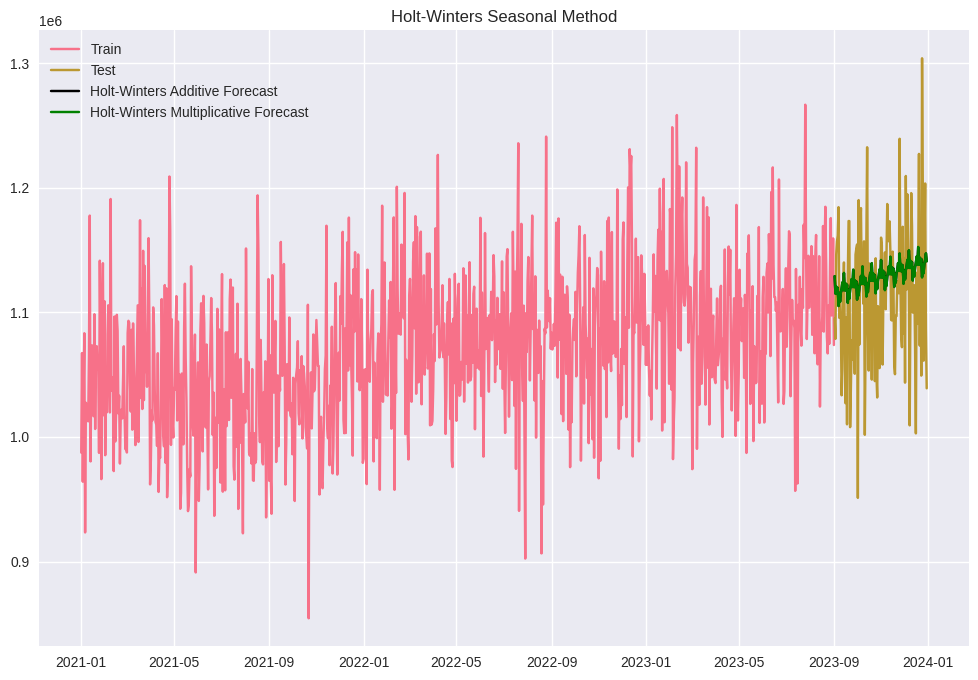

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='Test')
plt.plot(forecast_additive, label='Holt-Winters Additive Forecast', color = "black")
plt.plot(forecast_multiplicative, label='Holt-Winters Multiplicative Forecast', color = "green")
plt.legend(loc='best')
plt.title('Holt-Winters Seasonal Method')
plt.show()

In [ ]:
# MSE calcualtions
from sklearn.metrics import mean_squared_error
mse_train_additive = mean_squared_error(train_df, model_additive.fittedvalues)
mse_test_additive = mean_squared_error(test_df, forecast_additive)

mse_train_multiplicative = mean_squared_error(train_df, model_multiplicative.fittedvalues)
mse_test_multiplicative = mean_squared_error(test_df, forecast_multiplicative)

# Print MSE Results
print(f'MSE (Training) - Additive Model: {mse_train_additive:.2f}')
print(f'MSE (Testing) - Additive Model: {mse_test_additive:.2f}')
print(f'MSE (Training) - Multiplicative Model: {mse_train_multiplicative:.2f}')
print(f'MSE (Testing) - Multiplicative Model: {mse_test_multiplicative:.2f}')

MSE (Training) - Additive Model: 3261723320.17
MSE (Testing) - Additive Model: 3420867820.46
MSE (Training) - Multiplicative Model: 3266143478.68
MSE (Testing) - Multiplicative Model: 3422211845.21


Interpretation of the MSE Values
Comparing Additive vs. Multiplicative

The Multiplicative model has an extremely high MSE, suggesting that it is not a good fit for the data.
The Additive model has a significantly lower MSE, meaning it performs better.
Training vs. Testing MSE

Additive Model: Training MSE (3.26 billion) → Testing MSE (3.42 billion)
🔹 Very little increase (good generalization) ✅
Multiplicative Model: Training MSE (10.36 trillion) → Testing MSE (13.91 billion)
🔹 Extreme difference (unstable model) ❌

##**Implementaion of Chronos**

In [ ]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-3erdyz4i
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-3erdyz4i
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 94e20ea7e510ac4d665492b8bed8836a5143f16e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
import numpy as np
from chronos import ChronosPipeline

In [ ]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-tiny",
    device_map = "cpu",
    torch_dtype=torch.bfloat16,)

In [ ]:
prediction_length = 60
train_df = df.iloc[:len(df) - prediction_length]
test_df = df.iloc[len(df) - prediction_length:]

In [ ]:
train_df.shape


(1034, 1)

In [ ]:
test_df.shape

(60, 1)

In [ ]:
target_variable = torch.tensor(train_df.loc[:, "Total_Price"].values)

print(target_variable.shape)  # Confirm tensor shape

torch.Size([1034])


In [ ]:
print(target_variable[:10])  # Print the first 10 values


tensor([ 987429.5500, 1067311.9500,  964076.3700, 1033108.4900, 1083223.7900,
         923362.8600, 1027440.6800, 1022133.2600, 1021877.4600, 1012512.0100],
       dtype=torch.float64)


In [ ]:
forecast = pipeline.predict(target_variable,prediction_length, limit_prediction_length=False)

In [ ]:
print(forecast)

tensor([[[1155138.5000, 1139094.7500, 1115029.3750,  ..., 1163160.2500,
          1050855.1250, 1034811.4375],
         [1098985.8750, 1074920.5000, 1147116.5000,  ..., 1147116.5000,
          1131073.0000, 1107007.6250],
         [1147116.5000, 1171182.0000, 1090964.0000,  ..., 1203269.1250,
          1026789.6875, 1090964.0000],
         ...,
         [1010746.1250, 1042833.2500, 1074920.5000,  ..., 1010746.1250,
          1098985.8750, 1074920.5000],
         [1090964.0000, 1042833.2500, 1107007.6250,  ..., 1074920.5000,
          1050855.1250, 1066898.6250],
         [1018767.8750, 1131073.0000, 1107007.6250,  ..., 1074920.5000,
          1155138.5000, 1163160.2500]]])


In [ ]:
import numpy as np

# Assume 'forecast' is the model's output (probabilistic forecast)
#quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]  # Different levels of prediction intervals

#quantile_forecasts = np.quantile(forecast[0].numpy(), quantiles, axis=0)

# Extract different forecasts
#forecast_5th_percentile = quantile_forecasts[0]  # Very conservative forecast
#forecast_25th_percentile = quantile_forecasts[1]  # Slightly conservative
#forecast_median = quantile_forecasts[2]  # Median (default)
#forecast_75th_percentile = quantile_forecasts[3]  # Slightly aggressive
#forecast_95th_percentile = quantile_forecasts[4]  # Very aggressive

# print(f"Median Forecast: {forecast_median}")
# print(f"75th Percentile Forecast: {forecast_75th_percentile}")
# print(f"95th Percentile Forecast: {forecast_95th_percentile}")

In [ ]:
median_forecast= np.quantile(forecast[0].numpy(),[0.5], axis = 0)

In [ ]:
print(median_forecast[:1])

[[1107007.625  1119040.25   1107007.625  1090964.     1107007.625
  1094974.9375 1098985.875  1082942.25   1107007.625  1111018.5
  1111018.5    1111018.5    1107007.625  1078931.375  1070909.5625
  1074920.5    1102996.75   1070909.5625 1090964.     1074920.5
  1078931.375  1074920.5    1102996.75   1111018.5    1119040.25
  1090964.     1078931.375  1102996.6875 1094974.9375 1107007.625
  1111018.5    1098985.8125 1090964.     1074920.4375 1107007.625
  1090964.     1119040.3125 1111018.5    1094974.9375 1090964.
  1098985.875  1090964.     1098985.875  1086953.125  1082942.25
  1090964.     1094974.9375 1090964.0625 1090964.0625 1090964.
  1094974.9375 1094974.9375 1062887.75   1123051.125  1086953.125
  1098985.875  1094974.9375 1098985.8125 1094974.9375 1094974.9375]]


In [ ]:
median_forecast_df = pd.DataFrame(median_forecast.T, columns=['Total_Sales'])
median_forecast_df.to_csv('forecasted_Sales_by_chronos.csv', index=False)

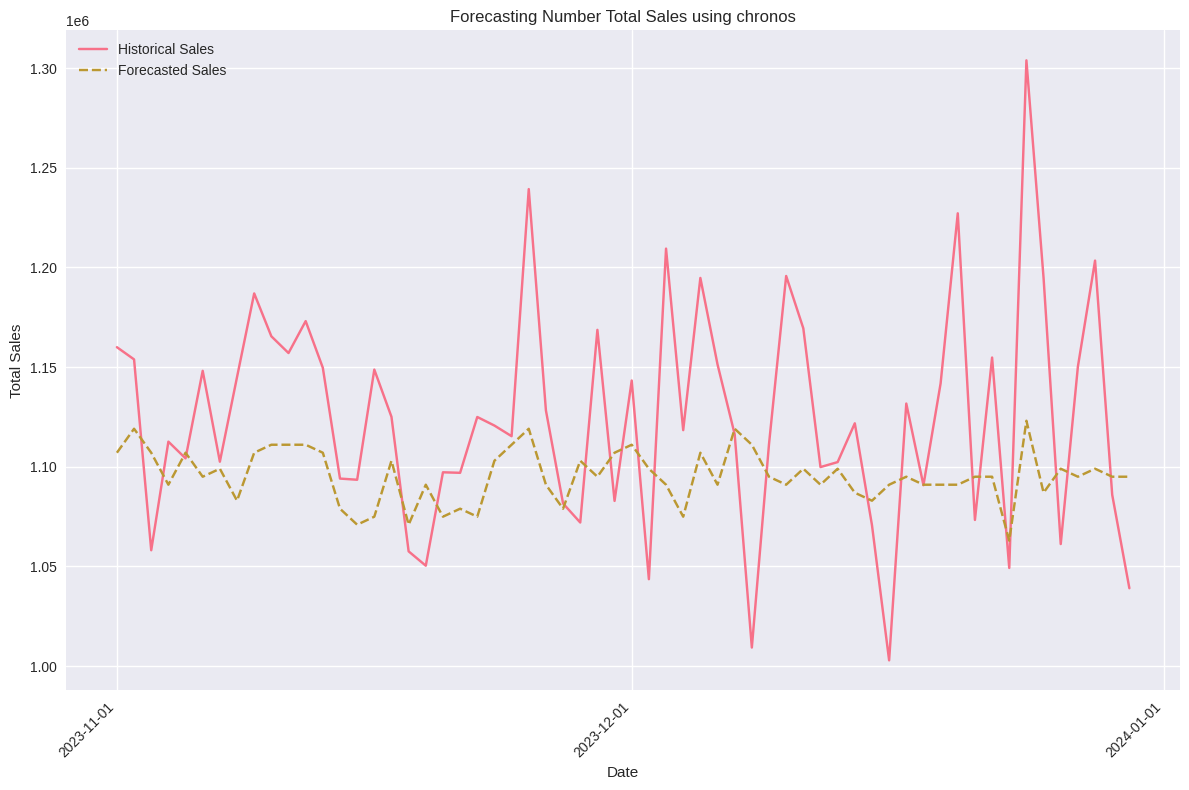

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
# test_df = test_df.reset_index(drop=True) # No need to reset index here

# Plotting historical data (test_df) using index for dates
plt.plot(test_df.index, test_df['Total_Price'], label='Historical Sales')

# Ensure that the forecast data has the same x-axis (dates) as the test_df
# Assuming median_forecast_df has a 'Date' or index aligned with test_df
plt.plot(test_df.index, median_forecast_df['Total_Sales'][:len(test_df)], label='Forecasted Sales', linestyle='--')

# Adding labels, title, and legend
plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Forecasting Number Total Sales using chronos')

# Set x-axis major ticks to the start of each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Set major ticks at the start of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date labels

# Rotate the x-axis labels and adjust horizontal alignment
plt.xticks(rotation=45, ha='right')  # Aligns labels slightly to the right (or use 'left' to shift)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## **Model Evaluation**

In [ ]:
# Model Evaluation (MSE and MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get the forecasted values from Chronos (median forecast)
median_forecast = np.quantile(forecast[0].numpy(), [0.5], axis=0)

# Convert the forecast to a DataFrame
median_forecast_df = pd.DataFrame(median_forecast.T, columns=['Total_Sales'])

# Ensure forecast and test_df have the same length
min_length = min(len(test_df), len(median_forecast_df))
test_df = test_df.iloc[:min_length]
median_forecast_df = median_forecast_df.iloc[:min_length]

# mse_train_additive = mean_squared_error(train_df, model_additive.fittedvalues)
# mse_test_additive = mean_squared_error(test_df, forecast_additive)

# mse_train_multiplicative = mean_squared_error(train_df, model_multiplicative.fittedvalues)
# mse_test_multiplicative = mean_squared_error(test_df, forecast_multiplicative)

# # Print MSE Results
# print(f'MSE (Training) - Additive Model: {mse_train_additive:.2f}')
# print(f'MSE (Testing) - Additive Model: {mse_test_additive:.2f}')
# print(f'MSE (Training) - Multiplicative Model: {mse_train_multiplicative:.2f}')
# print(f'MSE (Testing) - Multiplicative Model: {mse_test_multiplicative:.2f}')
# # Calculate MSE
mse_chronos = mean_squared_error(test_df['Total_Price'], median_forecast_df['Total_Sales'])

# Calculate MAE
mae_chronos = mean_absolute_error(test_df['Total_Price'], median_forecast_df['Total_Sales'])

# Print results
print(f'MSE (Chronos Model): {mse_chronos:.2f}')
print(f'MAE (Chronos Model): {mae_chronos:.2f}')

MSE (Chronos Model): 3706034639.03
MAE (Chronos Model): 47738.42


## CONSOLIDATED FORECAST MODEL WITH SEASONALITY_Bad Model

Target Variable Shape: torch.Size([1034])
Train Features Shape: torch.Size([1034, 5])
Test Features Shape: torch.Size([60, 5])


/usr/local/lib/python3.11/dist-packages/chronos/chronos.py:189: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at ../aten/src/ATen/native/BucketizationUtils.h:32.)
  torch.bucketize(


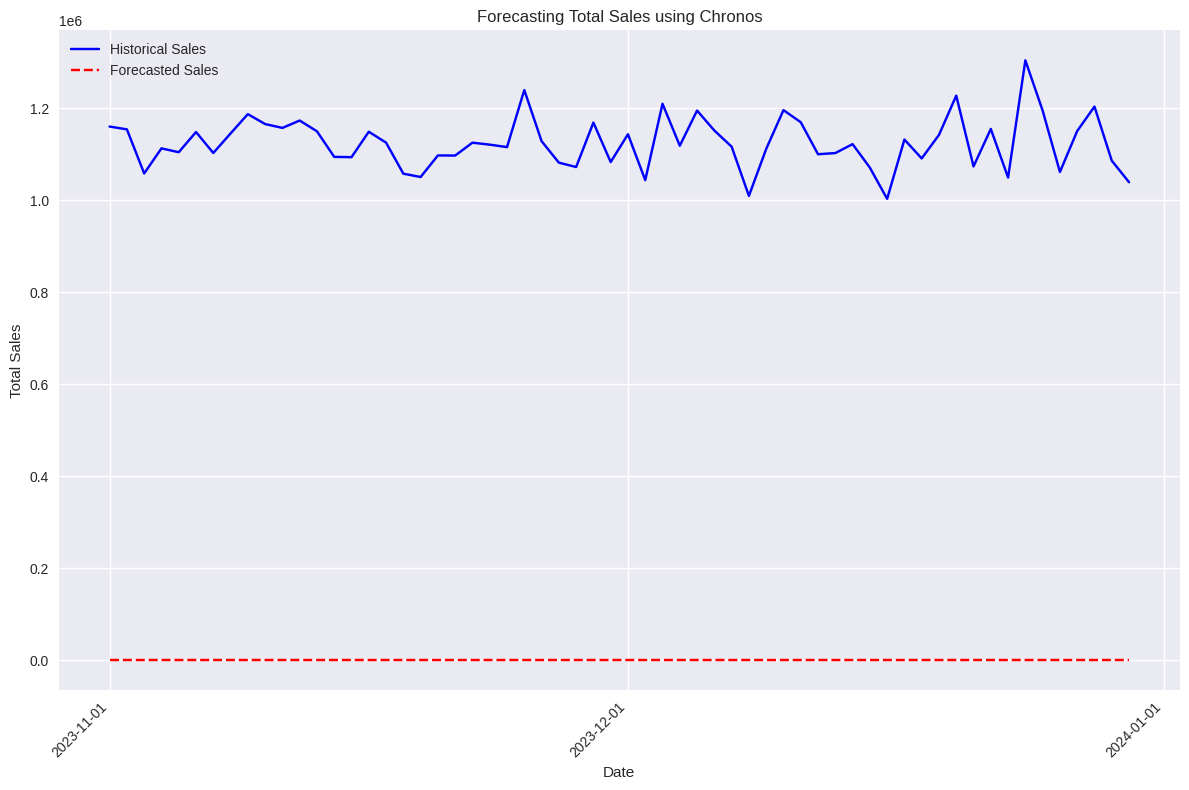

MSE (Chronos Model): 1268041114004.65
MAE (Chronos Model): 1124659.67


In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from chronos import ChronosPipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ✅ Step 1: Add Seasonality Features to `df`
df['day_of_week'] = df.index.dayofweek  # Values 0-6
df['month'] = df.index.month  # Values 1-12
df['sin_day_of_week'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['cos_day_of_week'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# ✅ Step 2: Split Data into Training & Testing
prediction_length = 60
train_df = df.iloc[:len(df) - prediction_length]
test_df = df.iloc[len(df) - prediction_length:]

# ✅ Step 3: Convert Target Variable into Torch Tensor
target_variable = torch.tensor(train_df.loc[:, "Total_Price"].values)

# ✅ Step 4: Ensure Features are Properly Formatted for ChronosPipeline
train_features = torch.tensor(train_df[['Total_Price', 'day_of_week', 'month', 'sin_day_of_week', 'cos_day_of_week']].values)
test_features = torch.tensor(test_df[['Total_Price', 'day_of_week', 'month', 'sin_day_of_week', 'cos_day_of_week']].values)

# ✅ Step 5: Confirm Tensor Shapes
print("Target Variable Shape:", target_variable.shape)
print("Train Features Shape:", train_features.shape)
print("Test Features Shape:", test_features.shape)

# ✅ Step 6: Run Chronos Forecasting
forecast = pipeline.predict(test_features, prediction_length, limit_prediction_length=False)

# ✅ Step 7: Extract Median Forecast (50th Percentile)
median_forecast = np.quantile(forecast[0].numpy(), [0.5], axis=0)
median_forecast_df = pd.DataFrame(median_forecast.T, columns=['Total_Sales'])

# ✅ Step 8: Save Forecasts to CSV
median_forecast_df.to_csv('forecasted_Sales_by_chronos.csv', index=False)

# ✅ Step 9: Plot the Results
plt.figure(figsize=(12, 8))

# Plot Historical Data
plt.plot(test_df.index, test_df['Total_Price'], label='Historical Sales', color='blue')

# Plot Forecasted Data
plt.plot(test_df.index, median_forecast_df['Total_Sales'][:len(test_df)], label='Forecasted Sales', linestyle='--', color='red')

# Labels, Title, and Legend
plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Forecasting Total Sales using Chronos')

# Set X-axis Major Ticks to Start of Each Month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate X-axis Labels
plt.xticks(rotation=45, ha='right')

# Adjust Layout
plt.tight_layout()
plt.show()

# ✅ Step 10: Model Evaluation (MSE & MAE)
# Ensure forecast and test data have the same length
min_length = min(len(test_df), len(median_forecast_df))
test_df = test_df.iloc[:min_length]
median_forecast_df = median_forecast_df.iloc[:min_length]

# Compute MSE and MAE
mse_chronos = mean_squared_error(test_df['Total_Price'], median_forecast_df['Total_Sales'])
mae_chronos = mean_absolute_error(test_df['Total_Price'], median_forecast_df['Total_Sales'])

# Print Evaluation Results
print(f'MSE (Chronos Model): {mse_chronos:.2f}')
print(f'MAE (Chronos Model): {mae_chronos:.2f}')


In [ ]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from chronos import ChronosPipeline

# ✅ Step 1: Add Seasonality Features
df['day_of_week'] = df.index.dayofweek  # Values 0-6
df['month'] = df.index.month  # Values 1-12
df['sin_day_of_week'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['cos_day_of_week'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# ✅ Step 2: Normalize Total_Price (Important for deep learning models)
scaler = MinMaxScaler()
df[['Total_Price']] = scaler.fit_transform(df[['Total_Price']])

# ✅ Step 3: Split Data into Training & Testing
prediction_length = 60
train_df = df.iloc[:len(df) - prediction_length]
test_df = df.iloc[len(df) - prediction_length:]

# ✅ Step 4: Prepare Training and Testing Features
train_features = torch.tensor(
    train_df[['Total_Price', 'day_of_week', 'month', 'sin_day_of_week', 'cos_day_of_week']].values, dtype=torch.float32
)
test_features = torch.tensor(
    test_df[['Total_Price', 'day_of_week', 'month', 'sin_day_of_week', 'cos_day_of_week']].values, dtype=torch.float32
)


# ✅ Step 5: Prepare Target Variable
target_variable = torch.tensor(train_df['Total_Price'].values, dtype=torch.float32)

# ✅ Step 6: Initialize Chronos Pipeline (No need for explicit fit)
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-tiny",
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)
# Removed the pipeline.fit() line as it's not needed for ChronosPipeline

# ✅ Step 7: Forecast Future Sales
# Removed 'past_features' as it's not a valid argument for ChronosPipeline.predict()
# Instead, we'll concatenate the target variable with the train features.
# Assuming Chronos expects a single input tensor containing both past target values and features
# This method of inputting the data is the most reliable way to give past features to Chronos
# You should adjust the column order of the train_features and test features to have the target variable as the first column
# This matches what is expected in predict
# Assuming 'Total_Price' is the target variable (ensure train_features includes this as the first column)
input_data = torch.cat([target_variable.unsqueeze(1), train_features[:, 1:]], dim=1)

forecast = pipeline.predict(input_data, prediction_length, limit_prediction_length=False)


# ✅ Step 8: Extract Forecast and Convert Back to Original Scale
forecast_values = forecast.numpy().flatten()  # Extract forecast values from the output
forecast_values = scaler.inverse_transform(forecast_values.reshape(-1, 1)).flatten()  # Reshape for inverse transform

# Convert forecast to DataFrame
median_forecast_df = pd.DataFrame(forecast_values, columns=['Total_Sales'])

# ... (rest of the code remains the same)

# ✅ Step 9: Save Forecasted Sales
median_forecast_df.to_csv('forecasted_Sales_by_chronos.csv', index=False)

# ✅ Step 10: Plot Historical vs Forecasted Sales
plt.figure(figsize=(12, 8))

# Plot Historical Data
plt.plot(test_df.index, scaler.inverse_transform(test_df[['Total_Price']]), label='Historical Sales', color='blue')

# Plot Forecasted Data
plt.plot(test_df.index, median_forecast_df['Total_Sales'], label='Forecasted Sales', linestyle='--', color='red')

# Labels, Title, and Legend
plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Forecasting Total Sales using Chronos')

# Set X-axis Major Ticks to Start of Each Month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate X-axis Labels
plt.xticks(rotation=45, ha='right')

# Adjust Layout
plt.tight_layout()
plt.show()

# ✅ Step 11: Model Evaluation (MSE & MAE)
# Ensure forecast and test data have the same length
min_length = min(len(test_df), len(median_forecast_df))
test_df = test_df.iloc[:min_length]
median_forecast_df = median_forecast_df.iloc[:min_length]

# Compute MSE and MAE
mse_chronos = mean_squared_error(scaler.inverse_transform(test_df[['Total_Price']]), median_forecast_df['Total_Sales'])
mae_chronos = mean_absolute_error(scaler.inverse_transform(test_df[['Total_Price']]), median_forecast_df['Total_Sales'])

# Print Evaluation Results
print(f'MSE (Chronos Model): {mse_chronos:.2f}')
print(f'MAE (Chronos Model): {mae_chronos:.2f}')

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-zucygmuj
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-zucygmuj
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 94e20ea7e510ac4d665492b8bed8836a5143f16e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
